In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

log_probs = np.load('../bayes_implicit_solvent/data/log_probs_C.npy')
theta = np.load('../bayes_implicit_solvent/data/theta_samples_C.npy')
posterior_preds = np.load('../bayes_implicit_solvent/data/posterior_predictions_C.npy')

Text(0, 0.5, 'log posterior')

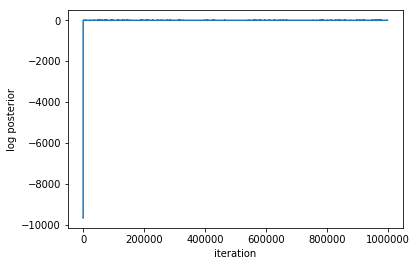

In [2]:
plt.plot(log_probs)
plt.xlabel('iteration')
plt.ylabel('log posterior')

Text(0, 0.5, 'predicted hydration free energy')

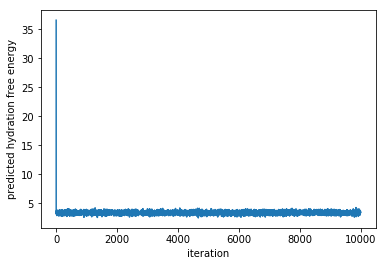

In [3]:
plt.plot(posterior_preds)
plt.xlabel('iteration')
plt.ylabel('predicted hydration free energy')

In [4]:
burn_in = 200
x = np.arange(len(log_probs))

Text(0, 0.5, 'log probability')

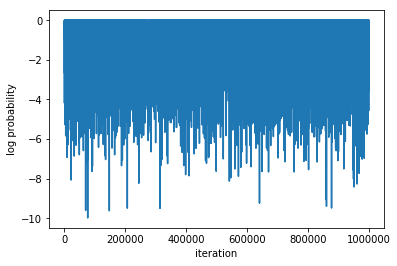

In [5]:
plt.plot(x[burn_in:], log_probs[burn_in:])
plt.xlabel('iteration')
plt.ylabel('log probability')

Text(0, 0.5, 'MCMC histogram counts')

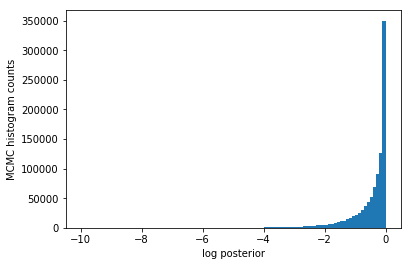

In [6]:
plt.hist(log_probs[burn_in:], bins=100);
plt.xlabel('log posterior')
plt.ylabel('MCMC histogram counts')

Text(0, 0.5, 'MCMC histogram counts')

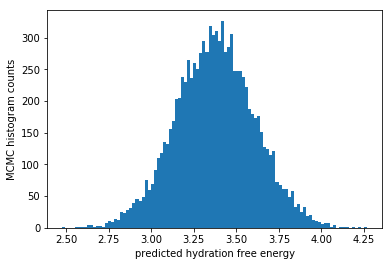

In [7]:
plt.hist(posterior_preds[burn_in:], bins=100);
plt.xlabel('predicted hydration free energy')
plt.ylabel('MCMC histogram counts')

In [8]:
parameter_names = ['C radius', 'H radius',
                   'C scale', 'H scale'
                  ]

In [9]:
def hexbin(x_ind, y_ind):
    plt.figure()
    plt.hexbin(theta[burn_in:,x_ind], theta[burn_in:,y_ind], bins='log', cmap='Blues')
    plt.colorbar()
    plt.xlabel(parameter_names[x_ind])
    plt.ylabel(parameter_names[y_ind])
    
    plt.title('{} vs {}'.format(parameter_names[x_ind], parameter_names[y_ind]))

In [10]:
n = int(len(theta[0]) / 2)

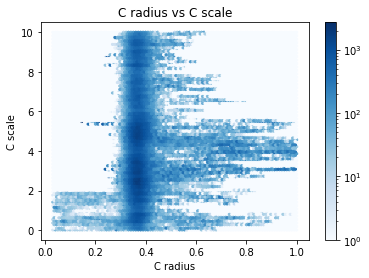

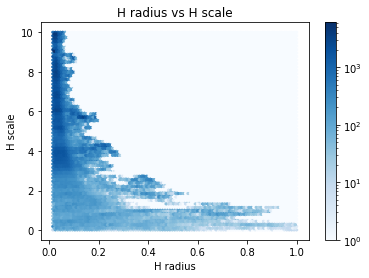

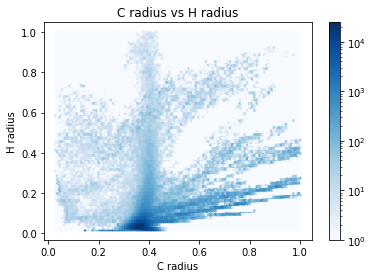

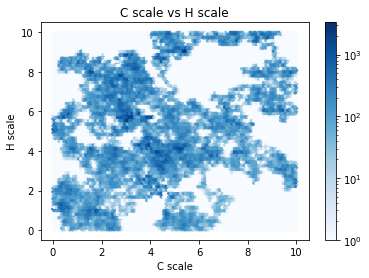

In [11]:
for i in range(n):
    hexbin(i, i+n)

for i in range(0, len(theta[0]), n):
    hexbin(i, i+1)

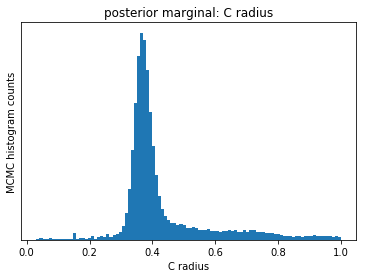

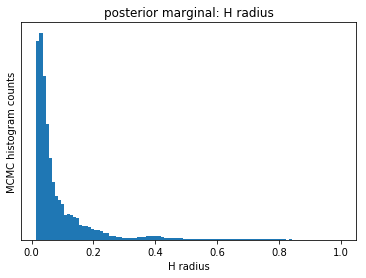

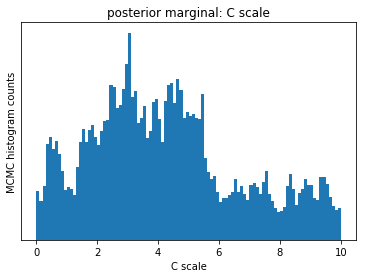

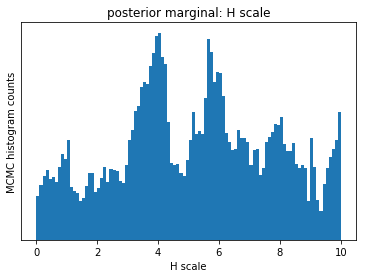

In [12]:
for i in range(len(theta[0])):
    plt.figure()
    plt.hist(theta[burn_in:,i], bins=100);
    plt.xlabel(parameter_names[i])
    plt.yticks([])
    plt.ylabel('MCMC histogram counts')
    
    plt.title("posterior marginal: {}".format(parameter_names[i]))

In [13]:
from sklearn.decomposition import PCA
pca = PCA()

In [14]:
pca.fit(theta)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
projection = pca.transform(theta)

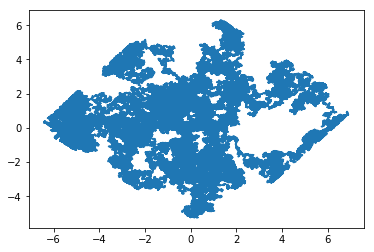

In [16]:
plt.plot(projection[:,0], projection[:,1])

Text(0, 0.5, 'PC2')

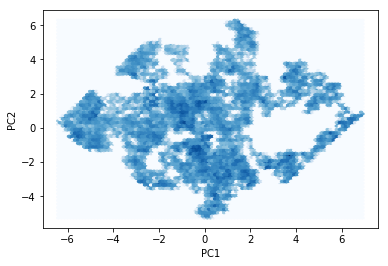

In [17]:
plt.hexbin(projection[:,0], projection[:,1], bins='log', cmap='Blues')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [18]:
pca.components_[0]

array([-0.00492426, -0.02116422,  0.64035945,  0.76776793])

Text(0, 0.5, 'cumulative explained variance')

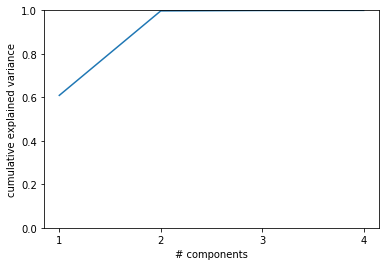

In [19]:
xticks = np.arange(len(theta[0]))+1
plt.plot(xticks, np.cumsum(pca.explained_variance_ratio_))
plt.ylim(0,1)
plt.xticks(xticks)
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')